In [1]:
import graphlab

In [2]:
sales = graphlab.SFrame('kc_house_data_small.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to pukaracharya2052@gmail.com and will expire on July 25, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1504030485.log


In [3]:
(train_and_validation, test) = sales.random_split(.8, seed=1)
(train, validation) = train_and_validation.random_split(.8, seed=1)

In [4]:
import numpy as np

In [5]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1
    features = ['constant'] + features
    features_sframe = data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    output_sarray = data_sframe[output]
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [6]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = feature_matrix/norms
    return (normalized_features, norms)

In [7]:
feature_list = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']

In [8]:
features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

In [9]:
features_train, norms = normalize_features(features_train) 
features_test = features_test / norms 
features_valid = features_valid / norms 

In [10]:
print features_test[0]

[ 0.01345102  0.01551285  0.01807473  0.01759212  0.00160518  0.017059    0.
  0.05102365  0.0116321   0.01564352  0.01362084  0.02481682  0.01350306
  0.          0.01345386 -0.01346927  0.01375926  0.0016225 ]


In [11]:
print features_train[9]

[ 0.01345102  0.01163464  0.00602491  0.0083488   0.00050756  0.01279425
  0.          0.          0.01938684  0.01390535  0.0096309   0.
  0.01302544  0.          0.01346821 -0.01346254  0.01195898  0.00156612]


# Quiz 1

In [12]:
# Euclidean Distance = sqrt((d2-d1)^2)

In [13]:
euclidean_distance = np.sqrt(np.sum((features_train[9] - features_test[0])**2))

In [14]:
euclidean_distance

0.059723593716661257

In [15]:
# For all remaining house

In [16]:
dist_dict = {}
for i in range(0,10):
    dist_dict[i] = np.sqrt(np.sum((features_train[i] - features_test[0])**2))
    print (i, np.sqrt(np.sum((features_train[i] - features_test[0])**2)))

(0, 0.0602747091729555)
(1, 0.085468811488270832)
(2, 0.061499464371202843)
(3, 0.053402739788200579)
(4, 0.058444840639381393)
(5, 0.059879215101840008)
(6, 0.054631404972615261)
(7, 0.055431083241597921)
(8, 0.052383627840972731)
(9, 0.059723593716661257)


# Quiz 2

In [17]:
print min(dist_dict.items(), key=lambda x: x[1]) 

(8, 0.052383627840972731)


In [18]:
for i in xrange(3):
    print features_train[i]-features_test[0]

[  0.00000000e+00  -3.87821276e-03  -1.20498190e-02  -1.05552733e-02
   2.08673616e-04  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -3.47633726e-03  -5.50336860e-03  -2.48168183e-02
  -1.63756198e-04   0.00000000e+00  -1.70072004e-05   1.30577772e-05
  -5.14364795e-03   6.69281453e-04]
[  0.00000000e+00  -3.87821276e-03  -4.51868214e-03  -2.26610387e-03
   7.19763456e-04   0.00000000e+00   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -3.47633726e-03   1.30705004e-03  -1.45830788e-02
  -1.91048898e-04   6.65082271e-02   4.23240653e-05   6.22415897e-06
  -2.89330197e-03   1.47606982e-03]
[  0.00000000e+00  -7.75642553e-03  -1.20498190e-02  -1.30002801e-02
   1.60518166e-03  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -5.21450589e-03  -8.32384500e-03  -2.48168183e-02
  -3.13866046e-04   0.00000000e+00   4.71047219e-05   1.56530415e-05
   3.72914476e-03   1.64764925e-03]


In [19]:
print features_train[0:3] - features_test[0]

[[  0.00000000e+00  -3.87821276e-03  -1.20498190e-02  -1.05552733e-02
    2.08673616e-04  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -3.47633726e-03  -5.50336860e-03  -2.48168183e-02
   -1.63756198e-04   0.00000000e+00  -1.70072004e-05   1.30577772e-05
   -5.14364795e-03   6.69281453e-04]
 [  0.00000000e+00  -3.87821276e-03  -4.51868214e-03  -2.26610387e-03
    7.19763456e-04   0.00000000e+00   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -3.47633726e-03   1.30705004e-03  -1.45830788e-02
   -1.91048898e-04   6.65082271e-02   4.23240653e-05   6.22415897e-06
   -2.89330197e-03   1.47606982e-03]
 [  0.00000000e+00  -7.75642553e-03  -1.20498190e-02  -1.30002801e-02
    1.60518166e-03  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -5.21450589e-03  -8.32384500e-03  -2.48168183e-02
   -3.13866046e-04   0.00000000e+00   4.71047219e-05   1.56530415e-05
    3.72914476e-03   1.64764925e-03]]


In [20]:
results = features_train[0:3] - features_test[0]
print results[0] - (features_train[0]-features_test[0])
print results[1] - (features_train[1]-features_test[0])
print results[2] - (features_train[2]-features_test[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [21]:
diff = features_train - features_test[0]

In [22]:
print diff[-1].sum()

-0.0934339605842


In [23]:
print np.sum(diff**2, axis=1)[15]
print np.sum(diff[15]**2)

0.00330705902879
0.00330705902879


In [24]:
distances = np.sqrt(np.sum(diff**2, axis=1))

In [25]:
print distances[100]

0.0237082324496


In [26]:
def compute_distances(train_matrix, query_vector):
    diff = train_matrix - query_vector
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return distances

# Quiz 3

In [28]:
third_house_distance = compute_distances(features_train, features_test[2])
print third_house_distance.argsort()[:1], min(third_house_distance)

[382] 0.00286049526751


In [29]:
print third_house_distance[382]

0.00286049526751


In [30]:
print np.argsort(third_house_distance, axis = 0)[:4]

[ 382 1149 4087 3142]


In [31]:
def compute_k_nearest_neighbors(k, features_matrix, feature_vector):
    distances = compute_distances(features_matrix, feature_vector)
    return np.argsort(distances, axis = 0)[:k]

# Quiz 4

In [32]:
print compute_k_nearest_neighbors(4, features_train, features_test[2])

[ 382 1149 4087 3142]


In [33]:
def compute_distances_k_avg(k, features_matrix, output_values, feature_vector):
    k_neigbors = compute_k_nearest_neighbors(k, features_matrix, feature_vector)
    avg_value = np.mean(output_values[k_neigbors])
    return avg_value   

# Quiz 5

In [34]:
print compute_distances_k_avg(4, features_train, output_train, features_test[2])

413987.5


In [35]:
print features_test[0:10].shape[0]

10


In [36]:
def compute_distances_k_all(k, features_matrix, output_values, feature_vector):
    num_of_rows = feature_vector.shape[0]
    predicted_values = []
    for i in xrange(num_of_rows):
        avg_value = compute_distances_k_avg(k, features_train, output_train, features_test[i])
        predicted_values.append(avg_value)
    return predicted_values

# Quiz 6

In [37]:
predicted_values = compute_distances_k_all(10, features_train, output_train, features_test[0:10])

In [38]:
predicted_values

[881300.0,
 431860.0,
 460595.0,
 430200.0,
 766750.0,
 667420.0,
 350032.0,
 512800.70000000001,
 484000.0,
 457235.0]

In [39]:
predicted_values.index(min(predicted_values))

6

In [40]:
min(predicted_values)

350032.0

In [42]:
rss_all = []
for k in range(1,16):    
    predict_value = compute_distances_k_all(k, features_train, output_train, features_valid)
    residual = (output_valid - predict_value)
    rss = sum(residual**2)
    rss_all.append(rss)

In [43]:
rss_all

[355632427476622.0,
 317939124951086.5,
 313153111376088.5,
 301621468995236.0,
 294266734341982.38,
 287781925015337.88,
 287842561046849.31,
 286179146468967.94,
 281718696883431.62,
 280358603702662.75,
 278687700531166.91,
 278744728841428.25,
 275043861135800.91,
 273895810640073.47,
 272162684453609.75]

In [44]:
rss_all.index(min(rss_all))

14

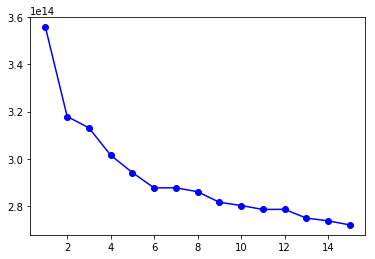

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 16)
plt.plot(kvals, rss_all,'bo-')

In [46]:
# Quiz 7

In [47]:
predict_value = compute_distances_k_all(14, features_train, output_train, features_test)
residual = (output_test - predict_value)
rss = sum(residual**2)

In [48]:
rss

133006256365677.28